In [1]:
import torch
from torchvision.datasets import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt
# import os; os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

c:\Users\khush\anaconda3\envs\dla2_env\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


# CIFAR Test


In [2]:
dataset = CIFAR10(root='data/', download=True, train=True, transform=transforms.ToTensor())

Files already downloaded and verified


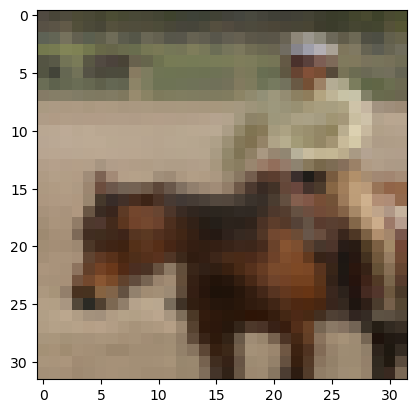

In [3]:
# divide dataset into train and validation
from torch.utils.data import random_split
seed = 42
train_to_val_split = 0.85
train_ds_len = int(len(dataset) * train_to_val_split)
val_ds_len = len(dataset) - train_ds_len
train_ds, val_ds = random_split(dataset, [train_ds_len, val_ds_len], generator=torch.Generator().manual_seed(seed))
plt.imshow(val_ds[0][0].permute(1, 2, 0));

In [4]:
len(train_ds), len(val_ds)

(42500, 7500)

In [5]:
images = torch.stack([img for img, _ in val_ds], dim=3)
mean = images.view(3, -1).mean(dim=1)
std = images.view(3, -1).std(dim=1)
mean, std

(tensor([0.4906, 0.4812, 0.4448]), tensor([0.2477, 0.2440, 0.2620]))

# Audio data

In [6]:
from torch.utils.data import Dataset, DataLoader
from torchaudio.datasets import SPEECHCOMMANDS

class AudioDataset(Dataset):
    def __init__(self, split:str="train") -> None:
        super().__init__()
        if split not in ["train", "test", "val"]:
            raise Exception("Data split must be in [train, test, val]")
        
        self.datasplit = split
        if self.datasplit == 'train':
            self.dataset = SPEECHCOMMANDS(root='./data', download=True, subset='training')
        elif self.datasplit == 'test':
            self.dataset = SPEECHCOMMANDS(root='./data', download=True, subset='testing')
        else:
            self.dataset = SPEECHCOMMANDS(root='./data', download=True, subset='validation')
        
    def __len__(self) -> int:
        return len(self.dataset)
    
    def __getitem__(self, index:int) -> tuple:
        waveform, sample_rate, label, speaker_id, utterance_number = self.dataset[index]
        return waveform, label
        
train_audio_ds = AudioDataset(split='train')
val_audio_ds = AudioDataset(split='val')
test_audio_ds = AudioDataset(split='test')

In [7]:
len(train_audio_ds), len(val_audio_ds), len(test_audio_ds)

(84843, 9981, 11005)

# Resnet Testing


In [3]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from Pipeline._2020211A2 import ImageDataset, AudioDataset, trainer, VGG_Q2, Resnet_Q1

data = ImageDataset(split='train')
loader = DataLoader(data, batch_size=128, shuffle=True)
model = Resnet_Q1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

Files already downloaded and verified


In [4]:
for img, label in loader:
    print(img.shape)
    out = model.forward_image(img)
    print(out.shape)
    break

torch.Size([128, 3, 32, 32])
torch.Size([128, 10])
